# Install Library

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install seaborn
# !pip install tensorflow
# !pip install datetime
# !pip install matplotlib
# !pip install pydot
# !pip install graphviz

# Import Library

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import tree
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import tensorflow

In [3]:
# Training Validation Tool Import
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# Data List

In [4]:
root_dir = os.path.join(os.getcwd(), 'data')    # Set Root Directory
f_lists = os.listdir(root_dir)                  # Get All File List
print("Files Lists : ", f_lists)                # Print Files

Files Lists :  ['Error Lot list.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-

In [5]:
new_file_lists = [f for f in f_lists if f.endswith('.csv')] # Get CSV File List from All File List
print("File Lists : ", new_file_lists)                      # Print CSV File List

File Lists :  ['Error Lot list.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-s

In [6]:
data_lists = new_file_lists[1:]             # Set Data File List
error_list = new_file_lists[0]              # Set Error File
print("Data Lists : ", data_lists)
print("Error Data List : ", error_list)

Data Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv',

# Make Function

In [7]:
def csv_read_(data_dir, data_list): # Read CSV File and PreProcess
    tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',')                       # Read CSV File
    y, m, d = map(int, data_list.split('-')[-1].split('.')[:-1])                        # Get Year, Month, Day from CSV Data
    time = tmp['Time']                                                                  # Get Time Column
    tmp['DTime'] = '-'.join(data_list.split('-')[-1].split('.')[:-1])                   # Make DateTime Column
    ctime = time.apply(lambda _ : _.replace(u'오후', 'PM').replace(u'오전', 'AM'))      # Change String Format
    n_time = ctime.apply(lambda _ : datetime.strptime(_, "%p %I:%M:%S.%f"))             # Change String Format
    newtime = n_time.apply(lambda _ : _.replace(year=y, month=m, day=d))                # Change String Format
    tmp['Time'] = newtime                                                               # Set Time Column
    return tmp

# Make Dedicated DataFrame

In [8]:
dd = csv_read_(root_dir, data_lists[0]) # Get 1st Value Data
for i in range(1, len(data_lists)):     # Get Value Data from Data File List and Merge with Previous Data DataFrame
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how='outer')
dd

,Index,Lot,Time,pH,Temp,Voltage,DTime
0,1,1,2021-09-06 16:29:54.000,2.15,43.15,19.74,2021-09-06
1,2,1,2021-09-06 16:29:59.000,2.08,40.13,18.01,2021-09-06
2,3,1,2021-09-06 16:30:04.000,2.18,43.46,18.73,2021-09-06
3,4,1,2021-09-06 16:30:09.000,1.99,41.72,16.75,2021-09-06
4,5,1,2021-09-06 16:30:14.000,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...,...,...
50089,1514,22,2021-10-27 18:36:03.300,2.05,42.84,15.38,2021-10-27
50090,1515,22,2021-10-27 18:36:08.300,1.91,42.64,19.08,2021-10-27
50091,1516,22,2021-10-27 18:36:13.300,2.11,44.09,18.14,2021-10-27
50092,1517,22,2021-10-27 18:36:18.300,1.92,43.95,17.96,2021-10-27


In [9]:
dd = dd.drop('Index', axis=1)   # Drop Index Column
dd

,Lot,Time,pH,Temp,Voltage,DTime
0,1,2021-09-06 16:29:54.000,2.15,43.15,19.74,2021-09-06
1,1,2021-09-06 16:29:59.000,2.08,40.13,18.01,2021-09-06
2,1,2021-09-06 16:30:04.000,2.18,43.46,18.73,2021-09-06
3,1,2021-09-06 16:30:09.000,1.99,41.72,16.75,2021-09-06
4,1,2021-09-06 16:30:14.000,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...,...
50089,22,2021-10-27 18:36:03.300,2.05,42.84,15.38,2021-10-27
50090,22,2021-10-27 18:36:08.300,1.91,42.64,19.08,2021-10-27
50091,22,2021-10-27 18:36:13.300,2.11,44.09,18.14,2021-10-27
50092,22,2021-10-27 18:36:18.300,1.92,43.95,17.96,2021-10-27


In [10]:
dd = dd.set_index('Time')   # Set Index with Time Column
dd

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54.000,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59.000,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04.000,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09.000,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14.000,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03.300,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08.300,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13.300,22,2.11,44.09,18.14,2021-10-27


In [11]:
dedicated_data = dd.copy()      # Copy Origin DataFrame
dedicated_data

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54.000,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59.000,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04.000,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09.000,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14.000,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03.300,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08.300,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13.300,22,2.11,44.09,18.14,2021-10-27


array([[<AxesSubplot: title={'center': 'Lot'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'Temp'}>,
        <AxesSubplot: title={'center': 'Voltage'}>]], dtype=object)

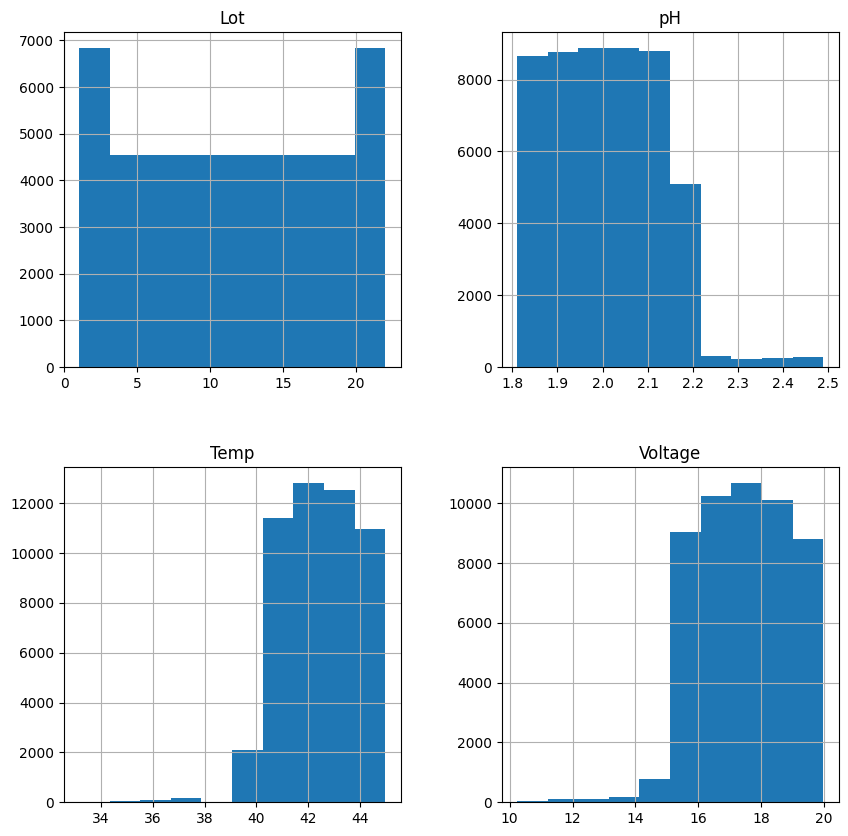

In [12]:
dedicated_data.hist(figsize=(10,10))    # Plot Histogram with Data DataFrame

In [13]:
dedicated_data = dedicated_data.dropna()    # Drop NaN Data
dedicated_data

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54.000,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59.000,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04.000,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09.000,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14.000,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03.300,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08.300,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13.300,22,2.11,44.09,18.14,2021-10-27


In [14]:
lot_lists = dedicated_data['Lot'].unique()  # Get Unique Lot List
print(lot_lists)                            # Print Lot List
print(len(lot_lists))                       # Print Lot List's Length

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


In [15]:
d_lists = dedicated_data['DTime'].unique()  # Get Unique Date List
print(d_lists)                              # Print Date List
print(len(d_lists))                         # Print Date List's Length

['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']
33


# Read Error Data

In [16]:
error = pd.read_csv(os.path.join(root_dir, error_list), sep=',')    # Get Error Data
error

,0,1,2
0,2021-09-06,NaN,NaN
1,2021-09-07,NaN,NaN
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
4,2021-09-10,NaN,NaN
5,2021-09-13,NaN,NaN
6,2021-09-14,NaN,NaN
7,2021-09-15,NaN,NaN
8,2021-09-16,4.0,NaN
9,2021-09-17,NaN,NaN


In [17]:
error_drop = error.dropna(thresh=2) # Drop Nan Row with threshold
error_drop

,0,1,2
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
8,2021-09-16,4.0,NaN
13,2021-09-28,16.0,NaN
16,2021-10-01,21.0,NaN
18,2021-10-06,6.0,NaN
29,2021-10-22,3.0,NaN
30,2021-10-25,16.0,NaN


In [18]:
lot_error_lists = []
lot_error_lists1 = error_drop['1'].unique().tolist()    # Get Unique Data From 1 column
lot_error_lists2 = error_drop['2'].unique()[~np.isnan(error_drop['2'].unique())].tolist()   # Get Unique Data From 2 column
lot_error_lists = lot_error_lists1 + lot_error_lists2   # Concat Error Lot List
lot_error_lists = list(map(int, lot_error_lists))       # Make 1-D array List
d_error_lists = error_drop['0'].unique()                # Get Unique Dates with Lot List
print("Unique LoT List : ", lot_error_lists)
print("Unique Date List : ", d_error_lists)

Unique LoT List :  [20, 16, 4, 21, 6, 3, 5]
Unique Date List :  ['2021-09-08' '2021-09-09' '2021-09-16' '2021-09-28' '2021-10-01'
 '2021-10-06' '2021-10-22' '2021-10-25']


Quality Check Value ( Target Value ) => 1 / 0 

1 : True ( Good Quality )

0 : False ( Bad Quality )

# Make Training Data Set

In [19]:
X_data = pd.DataFrame(columns=['pH','Temp','Voltage','QC']) # Initialize Training DataFrame

In [20]:
for d in d_lists:   # Loop with Date List
    for lot in lot_lists:   # Loop with Lot List
        tmp = dd[(dd['DTime']==d)&(dd['Lot']==lot)] # Crop Data with Date and Lot
        tmp = tmp[['pH', 'Temp','Voltage']] # Set X Data
        error_df = error_drop[(error_drop['0']==d)&((error_drop['1']==lot)|(error_drop['2']==lot))] # Get Target Values
        len_error = len(error_df)
        if len_error>0:
            trr = np.full((tmp['pH'].shape), 0)
        else:
            trr = np.full((tmp['pH'].shape), 1)
        tmp['QC'] = trr             # Set Y Data
        X_data = X_data.append(tmp) # Append List into DataFrame
X_data=X_data.apply(pd.to_numeric)  # Make Values to Numeric

C:\Users\kgt\AppData\Local\Temp\ipykernel_14980\3550008566.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp) # Append List into DataFrame
C:\Users\kgt\AppData\Local\Temp\ipykernel_14980\3550008566.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp) # Append List into DataFrame
C:\Users\kgt\AppData\Local\Temp\ipykernel_14980\3550008566.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp) # Append List into DataFrame
C:\Users\kgt\AppData\Local\Temp\ipykernel_14980\3550008566.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tm

In [21]:
X_data

,pH,Temp,Voltage,QC
2021-09-06 16:29:54.000,2.15,43.15,19.74,1
2021-09-06 16:29:59.000,2.08,40.13,18.01,1
2021-09-06 16:30:04.000,2.18,43.46,18.73,1
2021-09-06 16:30:09.000,1.99,41.72,16.75,1
2021-09-06 16:30:14.000,1.85,43.65,18.02,1
...,...,...,...,...
2021-10-27 18:36:03.300,2.05,42.84,15.38,1
2021-10-27 18:36:08.300,1.91,42.64,19.08,1
2021-10-27 18:36:13.300,2.11,44.09,18.14,1
2021-10-27 18:36:18.300,1.92,43.95,17.96,1


In [22]:
train_data, test_data = train_test_split(X_data, test_size=0.2) # Split DataFrame into Training and Test DataFrame

In [23]:
train_data.describe()

,pH,Temp,Voltage,QC
count,40075.000000,40075.000000,40075.000000,40075.000000
mean,2.008293,42.455578,17.454221,0.987424
std,0.122817,1.471053,1.455928,0.111439
min,1.810000,33.140000,10.240000,0.000000
25%,1.910000,41.300000,16.300000,1.000000
50%,2.010000,42.480000,17.490000,1.000000
75%,2.100000,43.650000,18.640000,1.000000
max,2.490000,44.990000,19.990000,1.000000


In [24]:
test_data.describe()

,pH,Temp,Voltage,QC
count,10019.000000,10019.000000,10019.000000,10019.000000
mean,2.008484,42.448661,17.445085,0.988322
std,0.123841,1.474843,1.467391,0.107436
min,1.810000,33.850000,10.230000,0.000000
25%,1.900000,41.300000,16.300000,1.000000
50%,2.010000,42.480000,17.470000,1.000000
75%,2.110000,43.650000,18.630000,1.000000
max,2.490000,44.990000,19.990000,1.000000


# Decision Tree Regressor Model

In [25]:
from sklearn import tree    # Import Another Model

In [26]:
clf = tree.DecisionTreeRegressor(max_depth=5)   # Base Decision Tree Model Initialize

In [27]:
clf = clf.fit(X_data[['pH','Temp','Voltage']], X_data[['QC']])  # Model Training

In [28]:
vis = True  # Set Visualize Trigger

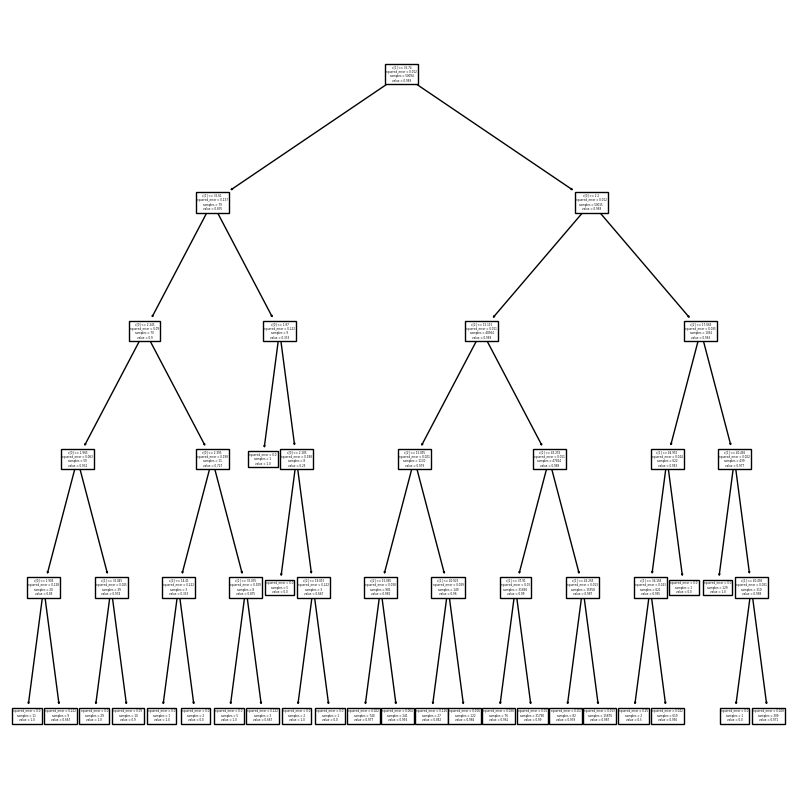

In [29]:
if vis:
    plt.figure(figsize=(10,10))
    tree.plot_tree(clf)
    plt.show()

# Decision Tree Regressor Model Tuning

In [30]:
new_clf = tree.DecisionTreeRegressor(max_depth=3)   # Tuned Decision Tree Model

In [31]:
new_clf = new_clf.fit(X_data[['pH','Temp','Voltage']], X_data[['QC']])  # Training Tuned Decision Tree Model

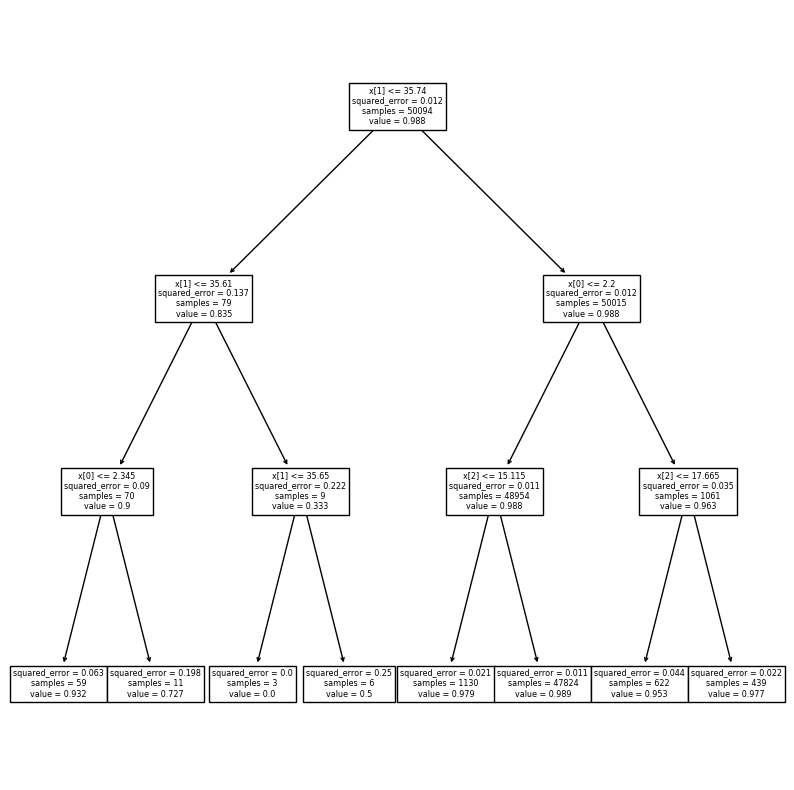

In [32]:
if vis:
    plt.figure(figsize=(10,10))
    tree.plot_tree(new_clf)
    plt.show()

# Test two Models

In [33]:
def get_confusion_matrix_values(y_true, y_pred):    # Make Confusion Matrix Value Function
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

## Base Decision Tree Model Validation

In [34]:
clf_predicted = clf.predict(test_data[['pH','Temp','Voltage']])  # Decision Tree Model Predict
print('Decision Tree Model Predict : ', clf_predicted)           # Print Decision Tree Model Predict Value
rmse = sqrt(mean_squared_error(test_data['QC'], clf_predicted))  # Calculate Decision Tree Model's RMSE
print('Decision Tree Model RMSE : ',rmse)                        # Print Decision Tree Model's RMSE

Decision Tree Model Predict :  [0.98958792 0.98958792 0.98958792 ... 0.98958792 0.98958792 0.98702444]
Decision Tree Model RMSE :  0.10655540573356578


In [35]:
y_test = test_data['QC']                                    # Set Target Origin Data
y_pred = [round(y, 0) for y in clf_predicted]               # Set Predicted Data
print("accuracy  = ", accuracy_score(y_test, y_pred))       # Print Accuracy
print("recall    = ", recall_score(y_test, y_pred))         # Print Recall
print("precision = ", precision_score(y_test, y_pred))      # Print Precision
print("f1 score  = ", f1_score(y_test, y_pred))             # Print F1-Score

accuracy  =  0.9884219982034135
recall    =  0.9998990103009493
precision =  0.9885183706070287
f1 score  =  0.9941761221006125


In [36]:
TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)    # Get Confusion Matrix
print("TP : ", TP)
print("FP : ", FP)
print("FN : ", FN)
print("TN : ", TN)

TP :  2
FP :  115
FN :  1
TN :  9901


In [37]:
if (TP+FN) == 0:
    tpr_val = 0
else:
    tpr_val = TP / (TP+FN)
if (TN+FP) == 0:
    fpr_val = 0
else:
    fpr_val = 1 - TN / (TN+FP)
print(tpr_val, fpr_val)

0.6666666666666666 0.01148162939297126


In [38]:
tpr, fpr, _ = roc_curve(y_test, y_pred) # Get ROC Curve Data
tpr[1] = tpr_val
fpr[1] = fpr_val
if len(tpr) < 3:
    tpr = np.append(tpr, 1)
    fpr = np.append(fpr, 1)
print(fpr, tpr)

[0.         0.01148163 1.        ] [0.         0.66666667 1.        ]


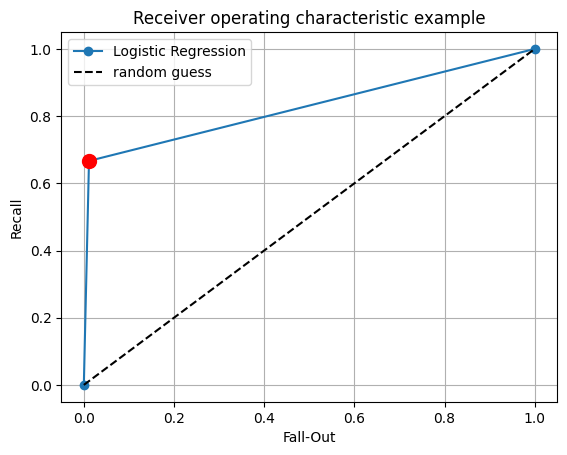

In [39]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")   # Plot ROC Curve Data
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr_val], [tpr_val], 'ro', ms=10)             # Plot Fallout Data
plt.xlabel('Fall-Out')                                  # Set x Label
plt.ylabel('Recall')                                    # Set y Label
plt.title('Receiver operating characteristic example')  # Set Title
plt.grid()                                              # Set Grid
plt.legend()                                            # Set Legend
plt.show()                                              # Show Plot Image

In [40]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))   # Print Report

              precision    recall  f1-score   support

     class 0       0.67      0.02      0.03       117
     class 1       0.99      1.00      0.99      9902

    accuracy                           0.99     10019
   macro avg       0.83      0.51      0.51     10019
weighted avg       0.98      0.99      0.98     10019



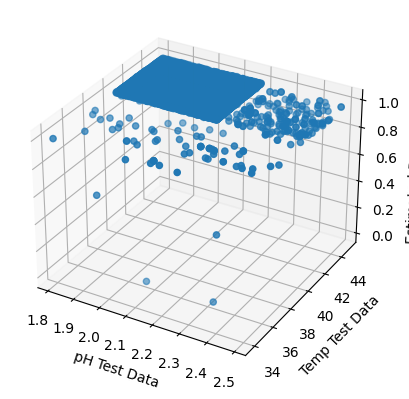

In [41]:
fig = plt.figure()                                              # Initialize Plot Figure
ax = fig.add_subplot(projection='3d')                                   # Make Plot to 3D
ax.scatter(test_data['pH'], test_data['Temp'], clf_predicted)   # Scatter Data pH, Temp and Predicted Data
ax.set_xlabel('pH Test Data')                                   # Set x Label
ax.set_ylabel('Temp Test Data')                                 # Set y Label
ax.set_zlabel('Estimated Process Data')                         # Set z Label
plt.show()

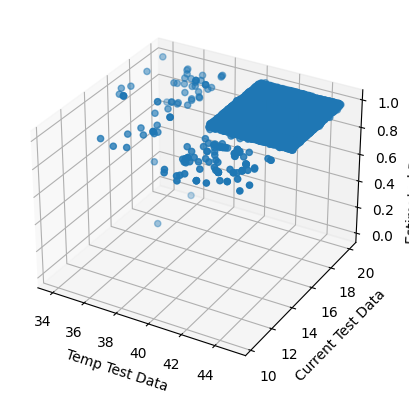

In [42]:
fig = plt.figure()                                                  # Initialize Plot Figure
ax = fig.add_subplot(projection='3d')                                       # Make Plot to 3D
ax.scatter(test_data['Temp'], test_data['Voltage'], clf_predicted)  # Scatter Data Temp, Voltage and Predicted Data
ax.set_xlabel('Temp Test Data')                                     # Set x Label
ax.set_ylabel('Current Test Data')                                  # Set y Label
ax.set_zlabel('Estimated Process Data')                             # Set z Label
plt.show()

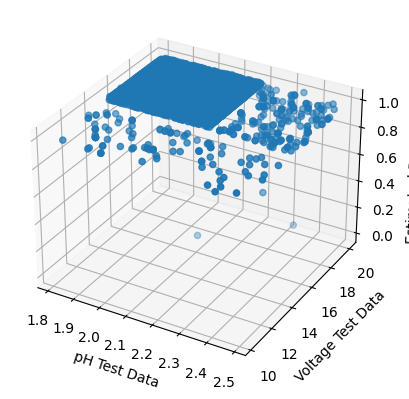

In [43]:
fig = plt.figure()                                                  # Initialize Plot Figure
ax = fig.add_subplot(projection='3d')                                       # Make Plot to 3D
ax.scatter(test_data['pH'], test_data['Voltage'], clf_predicted)    # Scatter Data pH, Voltage and Predicted Data
ax.set_xlabel('pH Test Data')                                       # Set x Label
ax.set_ylabel('Voltage Test Data')                                  # Set y Label
ax.set_zlabel('Estimated Process Data')                             # Set z Label
plt.show()

## Tuned Decision Model Validation

In [44]:
nclf_predicted = new_clf.predict(test_data[['pH','Temp','Voltage']])    # Tuned Decision Tree Model Predict
print('New Decision Tree Model Predict : ', nclf_predicted)             # Print Tuned Decision Tree Model Predict Value
rmse = sqrt(mean_squared_error(test_data['QC'], nclf_predicted))        # Calculate Tuned Decision Tree Model's RMSE
print('New Decision Tree Model RMSE : ',rmse)                           # Print Tuned Decision Tree Model's RMSE

New Decision Tree Model Predict :  [0.98860405 0.98860405 0.98860405 ... 0.98860405 0.98860405 0.98860405]
New Decision Tree Model RMSE :  0.10663954284466552


In [45]:
y_test = test_data['QC']                                # Set Target Origin Data
y_pred = [round(y, 0) for y in nclf_predicted]          # Set Predicted Data
print("accuracy  = ", accuracy_score(y_test, y_pred))   # Print Accuracy
print("recall    = ", recall_score(y_test, y_pred))     # Print Recall
print("precision = ", precision_score(y_test, y_pred))  # Print Precision
print("f1 score  = ", f1_score(y_test, y_pred))         # Print F1-Score

accuracy  =  0.988521808563729
recall    =  1.0
precision =  0.9885195168214036
f1 score  =  0.9942266178020985


In [46]:
TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)    # Get Confusion Matrix
print("TP : ", TP)
print("FP : ", FP)
print("FN : ", FN)
print("TN : ", TN)

TP :  2
FP :  115
FN :  0
TN :  9902


In [47]:
if (TP+FN) == 0:
    tpr_val = 0
else:
    tpr_val = TP / (TP+FN)
if (TN+FP) == 0:
    fpr_val = 0
else:
    fpr_val = TN / (TN+FP)
print(tpr_val, fpr_val)

1.0 0.9885195168214036


In [48]:
tpr, fpr, _ = roc_curve(y_test, y_pred) # Get ROC Curve Data
tpr[1] = tpr_val
fpr[1] = fpr_val
if len(tpr) < 3:
    tpr = np.append(tpr, 1)
    fpr = np.append(fpr, 1)
print(fpr, tpr)

[0.         0.98851952 1.        ] [0. 1. 1.]


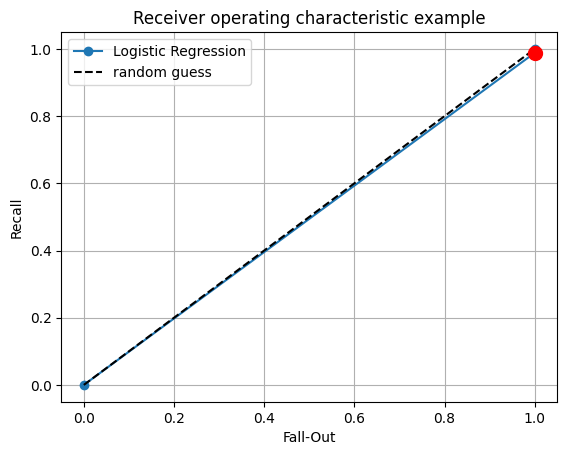

In [49]:
plt.plot(tpr, fpr, 'o-', label="Logistic Regression")   # Plot ROC Curve Data
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([tpr_val], [fpr_val], 'ro', ms=10)             # Plot Fallout Data
plt.xlabel('Fall-Out')                                  # Set x Label
plt.ylabel('Recall')                                    # Set y Label
plt.title('Receiver operating characteristic example')  # Set Title
plt.grid()                                              # Set Grid
plt.legend()                                            # Set Legend
plt.show()                                              # Show Plot Image

In [50]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))   # Print Report

              precision    recall  f1-score   support

     class 0       1.00      0.02      0.03       117
     class 1       0.99      1.00      0.99      9902

    accuracy                           0.99     10019
   macro avg       0.99      0.51      0.51     10019
weighted avg       0.99      0.99      0.98     10019



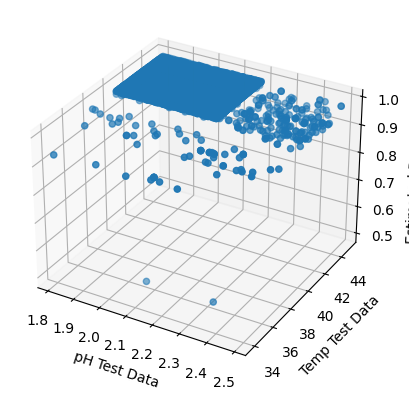

In [51]:
fig = plt.figure()                                                  # Initialize Plot Figure
ax = fig.add_subplot(projection='3d')                                       # Make Plot to 3D
ax.scatter(test_data['pH'], test_data['Temp'], nclf_predicted)      # Scatter Data pH, Temp and Predicted Data
ax.set_xlabel('pH Test Data')                                       # Set x Label
ax.set_ylabel('Temp Test Data')                                     # Set y Label
ax.set_zlabel('Estimated Process Data')                             # Set z Label
plt.show()

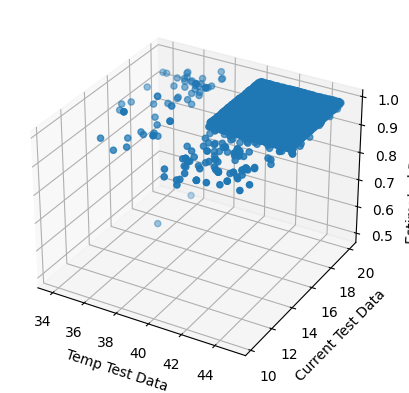

In [52]:
fig = plt.figure()                                                      # Initialize Plot Figure
ax = fig.add_subplot(projection='3d')                                           # Make Plot to 3D
ax.scatter(test_data['Temp'], test_data['Voltage'], nclf_predicted)     # Scatter Data Temp, Voltage and Predicted Data
ax.set_xlabel('Temp Test Data')                                         # Set x Label
ax.set_ylabel('Current Test Data')                                      # Set y Label
ax.set_zlabel('Estimated Process Data')                                 # Set z Label
plt.show()  

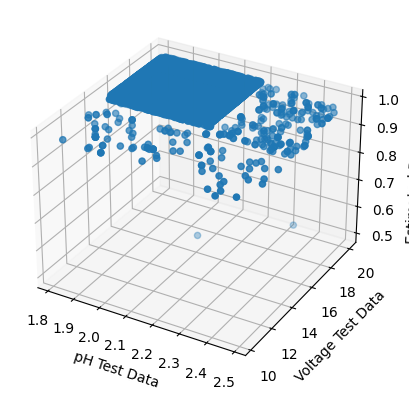

In [53]:
fig = plt.figure()                                                  # Initialize Plot Figure
ax = fig.add_subplot(projection='3d')                                       # Make Plot to 3D
ax.scatter(test_data['pH'], test_data['Voltage'], nclf_predicted)   # Scatter Data pH, Voltage and Predicted Data
ax.set_xlabel('pH Test Data')                                       # Set x Label
ax.set_ylabel('Voltage Test Data')                                  # Set y Label
ax.set_zlabel('Estimated Process Data')                             # Set z Label
plt.show()